In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import RandomState
from scipy import stats

In [2]:
def metropolis_hastings(rng, chain_start, n, logtarget, candidate_generating_density):
    x = chain_start
    chain = np.zeros(2 * n).reshape(2,n)
    accepted = 0
    
    for i in range(n):
        candidate = candidate_generating_density(x)
        
        if np.log(rng.uniform()) < logtarget(candidate) - logtarget(x):
            x = candidate
            accepted += 1
        
        chain[:,i] = x.reshape(2,)
        
    print(f"Hyväksyttyjä kandidaatteja: {(accepted/n)*100:.1f} %")
    return chain

# Statistical tests for the Metropolis-Hastings algorithm

The Metropolis-Hastings algorithm is used to produce a two-dimensional normal distribution, where the components are independent. **Independence of the components follows from the fact that the joint distribution of the components is multivariate normal AND the correlation between the components is zero. In general zero correlation does not imply indepence, but in the case of multinormality it does!**

Thus the normality of the components can be tested with one-dimensional normality tests. If the null hypothesis is one-dimensional normality for both components, then both components seem to pass these tests for 5 % or smaller significance values.

Hyväksyttyjä kandidaatteja: 48.2 %
(2, 1000)

Avg: 1.027390874726488
Shapiro p-value: 0.549119234085083
AndersonResult(statistic=0.4835167010847954, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Avg: 1.9673537686543072
Shapiro p-value: 0.08434996753931046
AndersonResult(statistic=0.7822309198479616, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


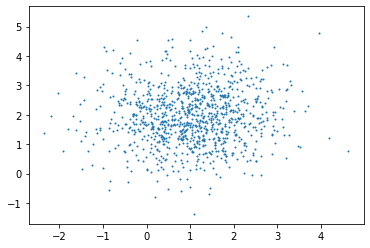

In [3]:
rng = RandomState(23)
mu = np.array([[1], [2]])
sigma = np.array([[1.0, 0.0], [0.0, 1.0]])
# print(sigma)
sigma_inverse = np.linalg.inv(sigma)

# The density function of multivariate normal distribution without the normalizing constant
logtarget = lambda x: -0.5 * np.transpose(x - mu) @ sigma_inverse @ (x - mu)
# Autoregressive generating density
proposal_density = lambda x: mu - (x - mu) + 1.9*rng.uniform(low=-1, high=1, size=2).reshape(2,1)
chain = metropolis_hastings(rng, np.array([[1.0], [2.0]]), 20_000, logtarget, proposal_density)
without = chain[:, 10_000:]
gaps = without[:,::10]
print(gaps.shape)

print()
# print(gaps[0, :])
print(f"Avg: {np.average(gaps[0,:])}")
_, p_value1 = stats.shapiro(gaps[0,:])
print(f"Shapiro p-value: {p_value1}")
print(stats.anderson(gaps[0,:], dist="norm"))

print()
#print(gaps[1, :])
print(f"Avg: {np.average(gaps[1,:])}")
_, p_value2 = stats.shapiro(gaps[1,:])
print(f"Shapiro p-value: {p_value2}")
print(stats.anderson(gaps[1,:], dist="norm"))

plt.scatter(gaps[0], gaps[1], s=1)
plt.show()